# **Tarea Nº 4**
Scope: APIs

Calificación: 19.5

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Viernes 12 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Armando Paredes ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

The Central Bank Reserve of Perú (BCRP) holds a list of datasets that are among the most comprehensive for macroeconomic purposes. In this exercise, we'll retrieve data from the [BCRP API](https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api) and explore the impact of pandemics

## Before starting

- You must pull the necessary data using `get` and `requests`
- You are required to apply the concepts learned in the previous sessions (`pandas`, `if`, `loop`, `function`)
- Hint: here is the BCRP url structure for the APIs call:
```html
https://estadisticas.bcrp.gob.pe/estadisticas/series/api/[códigos de series]/[formato de salida]/[periodo inicial]/[periodo final]/[idioma]
```

## The very long run

1. Locate the "Estadísticas de 100 años del BCRP" section in the BCRP´s series data statistics [here](https://estadisticas.bcrp.gob.pe/estadisticas/series/index) and identify the necessary code for the serie **`PBI (Mill S/ 2007)`**. Later, add manually the annual GDP values for 2022 and 2023 (be careful with the units of data). Then, **calculate** the Peruvian annual GDP growth (%) since 1922 to 2023. Finally, plot it using a very simple graph through `matplotlib` and provide critical insights (no more than 100 words)

    Hint1: use `.json()` for exploring the `content`. Your data is inside `["periods"]`
    
    Hint2: the graph must looks something like this: <img src="growth_gdp_long_run.png" max-width="300">
    

In [136]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.dates as mdates
from datetime import datetime
import statsmodels.api as sm
import numpy as np


In [189]:
# URL de la API para la serie PD39593DA en formato JSON
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PM04860AA/json/1921/2023"

# Realizar la solicitud GET
response = requests.get(url)


In [190]:
# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()
else:
    print("Error en la solicitud:", response.status_code)

In [195]:
#observar la data extraida desde el API
periods = data['periods']
df = pd.DataFrame(periods)
# Convertir la columna 'values' a números flotantes
df['values'] = df['values'].apply(lambda x: float(x[0])) #  apply para aplicar esta operación a cada elemento de una columna de un DataFrame
#lambda x: float(x[0]) define una función anónima (lambda) en Python. En este caso, la función toma un argumento x y realiza la siguiente operación:
#x[0]: Accede al primer elemento de x. Aquí, asumimos que x es una lista o algún iterable.
# float(...): Convierte ese primer elemento a un número flotante.
# Convertir la columna 'values' a números flotantes
#df['values'] = df['values'].astype(float)
df



,name,values
0,1922,13308.287921
1,1923,14084.165195
2,1924,15427.896049
3,1925,15803.574185
4,1926,17335.854294
...,...,...
96,2018,534665.000000
97,2019,546605.000000
98,2020,486402.086278
99,2021,552526.316008


In [193]:
pbi_values_22_23 = df.tail(3)
pbi_values_22_23

,name,values
98,2020,486402.086278
99,2021,552526.316008
100,2022,567339.767689


In [203]:
df['name'] = pd.to_datetime(df['name'], format='%Y')

# Ordenar el DataFrame por 'name'
df = df.sort_values('name')

# Calcular la tasa de crecimiento anual
df['Crecimiento_Anual'] = df['values'].pct_change() * 100

# Eliminar las filas con valores NaN resultantes del cálculo de cambios porcentuales
df.dropna(subset=['Crecimiento_Anual'], inplace=True)

# Visualizar el DataFrame resultante
print(df)

          name         values  Crecimiento Anual  Crecimiento_Anual
4   1926-01-01   17335.854294           9.695782           9.695782
5   1927-01-01   17726.959481           2.256048           2.256048
6   1928-01-01   18743.003273           5.731630           5.731630
7   1929-01-01   20726.920304          10.584841          10.584841
8   1930-01-01   18612.209986         -10.202723         -10.202723
..         ...            ...                ...                ...
96  2018-01-01  534665.000000           3.976936           3.976936
97  2019-01-01  546605.000000           2.233174           2.233174
98  2020-01-01  486402.086278         -11.013971         -11.013971
99  2021-01-01  552526.316008          13.594561          13.594561
100 2022-01-01  567339.767689           2.681040           2.681040

[97 rows x 4 columns]


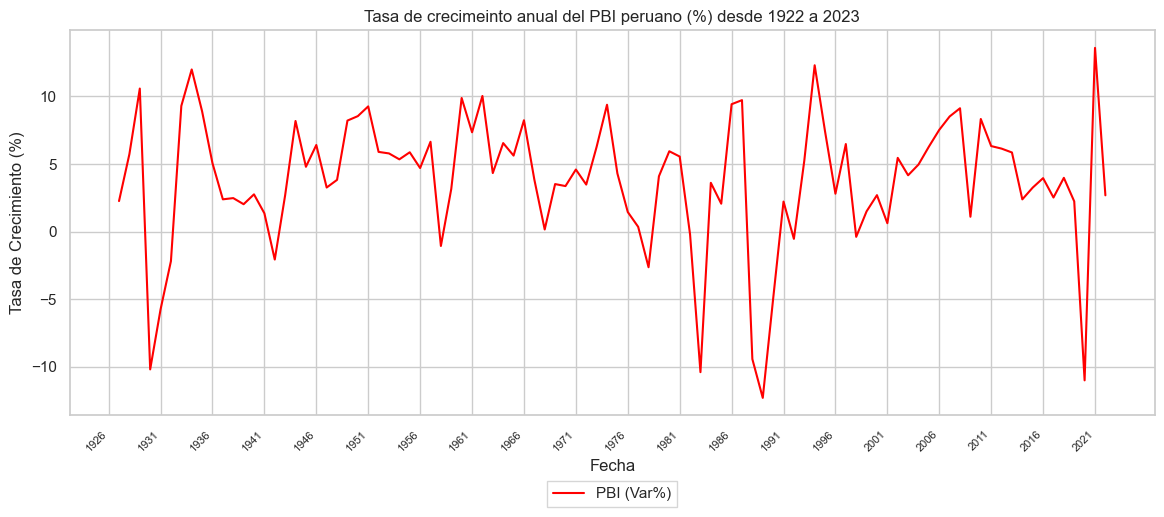

In [210]:
# Create a plot
plt.figure(figsize=(14, 5))
plt.plot(df.name.iloc[1:], df.Crecimiento_Anual.iloc[1:], linestyle='-',color='red', label='PBI (Var%)')
plt.title('Tasa de crecimeinto anual del PBI peruano (%) desde 1922 a 2023')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Crecimiento (%)')
plt.grid(True)
# Especificar la ubicación y formato de las marcas en el eje x
plt.xticks(df.name.iloc[0::5], rotation=0, ha="right", fontsize=8)
# Configurar los ticks del eje x
plt.xticks(df['name'].iloc[::5], [year.year for year in df['name'].iloc[::5]], rotation=45, ha="right", fontsize=8)
# agregar leyenda
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=False, ncol=1)
# Mostrar el gráfico
plt.show()

Se visualiza que las tasas de crecimiento han ido de valores positivos a negativos resaltándose ciertos eventos que marcaron a la economía peruana como guerras, periodos de crisis económicas, pandemias, etc. Por ejemplo, en el gráfico, se expresa la gran caída del PBI en el año 2020 por efectos de la pandemia COVID-19; asimismo, se denota la época critica de los 80s y 90s donde se experimentó tasas de crecimiento negativas, luego, se expone el periodo de recuperación en los 2000, donde se consiguieron tasas de crecimiento positivas y sostenidas, que se fundamentaron en una parte por la super ciclo de las materias primas.

## The hitman

2. Retrieve the up-to-date data for the monthly GDP in index (2007=100) from this [link](https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/producto-bruto-interno-y-demanda-interna-variaciones-indice-2007). Then, calculate the the 5-year average monthly growth previous to the pandemics (ending in Feb-2020) for the 12-month rolling mean of the index, and project the alternative scenario of the Peruvian economy without the COVID-19. Then plot them out and provide insight from the gap between the real data and the pre-pandemic trend.

    Hint1: You may use the regression type of your election, but the OLS is recommended. 
    
    Hint2: Your plot should look somethig like this. You aren´t required to add flags/annotations/texts inside the graph <img src="growth_gdp_pandemics.png" max-width="300">

    Hint3: For more details about calculation, review this post from [The Economist](https://www.economist.com/graphic-detail/2021/10/28/americas-post-covid-economic-recovery-suffers-a-setback)
    


In [145]:
import pandas as pd
import requests 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import json
from sklearn.linear_model import LinearRegression

In [146]:
# Extraer la data desde el API del BCRP

# URL de la API para la serie PN01770AM (PBI 2007 = 100) en json
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01770AM/json/2015-2/2023-10"

# Realizar la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    data = response.json()
else:
    print("Error en la solicitud:", response.status_code)
data

{'config': {'title': 'Producto bruto interno y demanda interna (índice 2007=100)',
  'series': [{'name': 'Producto bruto interno y demanda interna (índice 2007=100) - PBI',
    'dec': '1'}]},
 'periods': [{'name': 'Feb.2015', 'values': ['137.470299533785']},
  {'name': 'Mar.2015', 'values': ['148.339778409561']},
  {'name': 'Abr.2015', 'values': ['152.038604723334']},
  {'name': 'May.2015', 'values': ['150.15719220135']},
  {'name': 'Jun.2015', 'values': ['150.578546994917']},
  {'name': 'Jul.2015', 'values': ['153.252908823275']},
  {'name': 'Ago.2015', 'values': ['149.48186711913']},
  {'name': 'Sep.2015', 'values': ['151.999229212378']},
  {'name': 'Oct.2015', 'values': ['155.730120691974']},
  {'name': 'Nov.2015', 'values': ['153.424114847416']},
  {'name': 'Dic.2015', 'values': ['170.391576698868']},
  {'name': 'Ene.2016', 'values': ['143.100520938942']},
  {'name': 'Feb.2016', 'values': ['146.316293752734']},
  {'name': 'Mar.2016', 'values': ['153.620687314018']},
  {'name': 'Abr

In [147]:
# Convertir los datos a una cadena JSON
datos_json = json.dumps(data, indent=4)

# Ruta del archivo donde se guardará el JSON
ruta_archivo = 'data.json'

# Escribir la cadena JSON en un archivo
with open(ruta_archivo, 'w') as archivo:
    archivo.write(datos_json)

print(f"Archivo JSON '{ruta_archivo}' creado con éxito.")

Archivo JSON 'data.json' creado con éxito.


In [148]:
# Función para convertir JSON a DataFrame:

def convertir_json_a_dataframe(data_json):
    df = pd.DataFrame(data_json['periods'])
    df['name'] = df['name'].str.replace('.', '', regex=False)
    df['name'] = df['name'].replace({'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
                                     'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'}, regex=True)
    df['fecha'] = pd.to_datetime(df['name'], format='%b%Y')
    df['indice'] = pd.to_numeric(df['values'].str[0])
    df = df.set_index('fecha')
    return df

# Leer datos desde un archivo JSON
with open('data.json', 'r') as file:
    data_json = json.load(file)

# Convertir los datos JSON a DataFrame
df = convertir_json_a_dataframe(data_json)
print(df)

               name              values      indice
fecha                                              
2015-02-01  Feb2015  [137.470299533785]  137.470300
2015-03-01  Mar2015  [148.339778409561]  148.339778
2015-04-01  Apr2015  [152.038604723334]  152.038605
2015-05-01  May2015   [150.15719220135]  150.157192
2015-06-01  Jun2015  [150.578546994917]  150.578547
...             ...                 ...         ...
2023-06-01  Jun2023  [177.334725185052]  177.334725
2023-07-01  Jul2023  [175.480990031864]  175.480990
2023-08-01  Aug2023  [178.066865625777]  178.066866
2023-09-01  Sep2023  [179.973752609623]  179.973753
2023-10-01  Oct2023  [181.396080426984]  181.396080

[105 rows x 3 columns]


In [149]:
#df_seleccionado = df.loc[:, ['columna1', 'columna2']]
df = df.loc[:, ['indice']]
print(df)

                indice
fecha                 
2015-02-01  137.470300
2015-03-01  148.339778
2015-04-01  152.038605
2015-05-01  150.157192
2015-06-01  150.578547
...                ...
2023-06-01  177.334725
2023-07-01  175.480990
2023-08-01  178.066866
2023-09-01  179.973753
2023-10-01  181.396080

[105 rows x 1 columns]


In [150]:
# Calcular el promedio móvil de 12 meses
df['pbi_moving_avg'] = df['indice'].rolling(window=12).mean()
df.dropna(inplace=True)
df

,indice,pbi_moving_avg
fecha,,
2016-01-01,143.100521,151.330397
2016-02-01,146.316294,152.067563
2016-03-01,153.620687,152.507639
2016-04-01,156.272230,152.860441
2016-05-01,157.496837,153.472078
...,...,...
2023-06-01,177.334725,177.103408
2023-07-01,175.480990,176.926177
2023-08-01,178.066866,176.848477


In [151]:
# Normalizar los valores (Feb - 2020 = 100)
valor_feb_2020 = df.loc['2020-02-01', 'pbi_moving_avg']
df['pbi_moving_avg_normalized'] = (df['pbi_moving_avg'] / valor_feb_2020) * 100
df.dropna(inplace=True)
print(df)


                indice  pbi_moving_avg  pbi_moving_avg_normalized
fecha                                                            
2016-01-01  143.100521      151.330397                  87.976506
2016-02-01  146.316294      152.067563                  88.405060
2016-03-01  153.620687      152.507639                  88.660900
2016-04-01  156.272230      152.860441                  88.866003
2016-05-01  157.496837      153.472078                  89.221580
...                ...             ...                        ...
2023-06-01  177.334725      177.103408                 102.959745
2023-07-01  175.480990      176.926177                 102.856711
2023-08-01  178.066866      176.848477                 102.811539
2023-09-01  179.973753      176.651824                 102.697214
2023-10-01  181.396080      176.526213                 102.624190

[94 rows x 3 columns]


In [152]:
# Dividir los datos en entrenamiento y prueba
train = df[df.index < pd.to_datetime('2020-03-01')]
test = df[df.index >= pd.to_datetime('2020-02-01')]

print("Datos de entrenamiento")
print(train)
print("Datos de test")
print(test)

Datos de entrenamiento
                indice  pbi_moving_avg  pbi_moving_avg_normalized
fecha                                                            
2016-01-01  143.100521      151.330397                  87.976506
2016-02-01  146.316294      152.067563                  88.405060
2016-03-01  153.620687      152.507639                  88.660900
2016-04-01  156.272230      152.860441                  88.866003
2016-05-01  157.496837      153.472078                  89.221580
2016-06-01  155.977419      153.921984                  89.483135
2016-07-01  158.742284      154.379432                  89.749074
2016-08-01  158.111338      155.098554                  90.167138
2016-09-01  158.845788      155.669101                  90.498828
2016-10-01  159.111358      155.950871                  90.662636
2016-11-01  158.795139      156.398456                  90.922841
2016-12-01  176.279514      156.889117                  91.208089
2017-01-01  150.311211      157.490008               

In [153]:
# Preparar los datos para el modelo de regresión y Convertir las fechas a un formato numérico para el modelo
X_train = np.array(train.index.map(pd.Timestamp.toordinal)).reshape(-1, 1)
y_train = train['pbi_moving_avg_normalized']

In [154]:
# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores futuros
X_test = np.array(test.index.map(pd.Timestamp.toordinal)).reshape(-1, 1)
test['predictions'] = model.predict(X_test)

/var/folders/9d/2r5xh7sn3vs5d7bq30nnmk2r0000gn/T/ipykernel_13252/1143214142.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = model.predict(X_test)


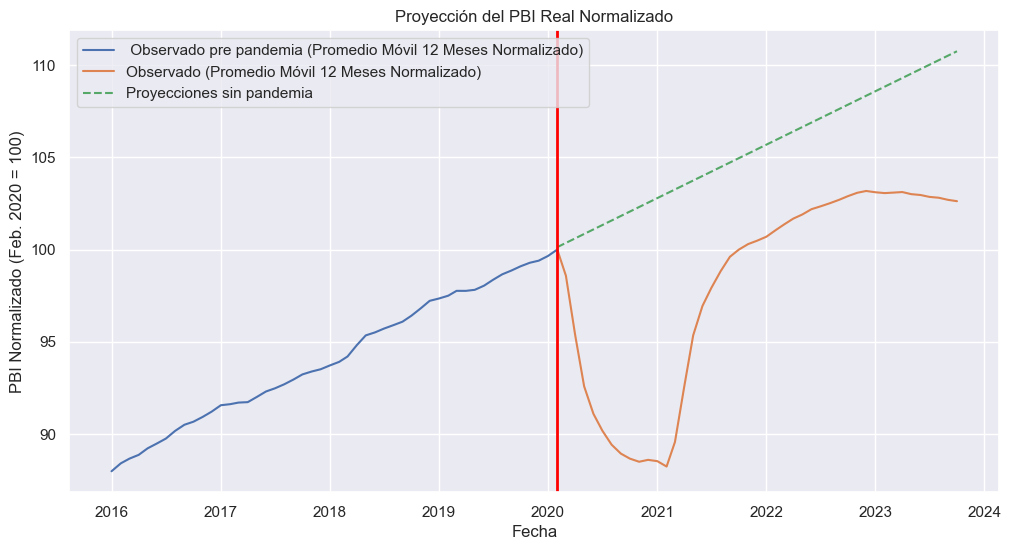

In [155]:
#Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['pbi_moving_avg_normalized'], label=' Observado pre pandemia (Promedio Móvil 12 Meses Normalizado)')
plt.plot(test.index, test['pbi_moving_avg_normalized'], label='Observado (Promedio Móvil 12 Meses Normalizado)')
plt.plot(test.index, test['predictions'], label='Proyecciones sin pandemia', linestyle='--')

plt.axvline(pd.to_datetime('2020-02-01'), color='red', linestyle='-', linewidth=2)
plt.grid(True)

plt.xlabel('Fecha')
plt.ylabel('PBI Normalizado (Feb. 2020 = 100)')
plt.title('Proyección del PBI Real Normalizado')
plt.legend()
plt.show()


No hay análisis.

**Calificación: -0.5**

## The winners

- Based on the [Nasdaq Stock Screener](https://www.nasdaq.com/market-activity/stocks/screener), identify the three largest companies in the three larger sectors defined by market cap
- Elaborate a list/dictionary/series (what ever you think is more suitable) containing all tickers (or symbols) and sectors from these companies.
- So far, you can download data from Nasdaq, web scrape it or copy it manually. It doesn´t matter
- Then, use `yfinance` library to retrieve the market data for all the 9 firms
- Construct a table with the most common *institucional holders* by sector. Is there any interesting pattern? Hint: loop the `institutional_holders` from `yfinance`
- Calculate the distribution of the daily percentage returns for the 3 larger companies (defined by market cap) along the last 5 years. Plot your results (feel free to find the most appealing way to represent them) and provide critical insights

$$
  percentage\_return_{t} = \frac{price_t-price_{t-1}}{price_t}*100+dividends (\%)
$$

- Hint1: you can find the `dividens` through the `yfinance`'s 
`Ticker()`
- Hint2: some firms may not be paying dividends

In [225]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from datetime import date, timedelta
import seaborn as sns

In [250]:
# Solution
# 3 sectores: tecnologia, consumidor discrecional y telecomunicaciones 

datos = {
    "Symbol": ["AAPL", "MSFT", "GOOG","AMZN","TSLA","COST","CSCO","TMUS","CMCSA"],
    "Sector": ["Technology","Technology","Technology","Consumer Discretionary","Consumer Discretionary","Consumer Discretionary","Telecommunications","Telecommunications","Telecommunications"]
}

Then, use `yfinance` library to retrieve the market data for all the 9 firms

In [251]:
# Extraer la lista de símbolos
symbols = datos["Symbol"]

# Crear un DataFrame vacío para almacenar los datos
all_data = pd.DataFrame()

for symbol in symbols:
    
    ticker = yf.Ticker(symbol)

    # Datos históricos del mercado para este ticker
    data = ticker.history(period="1y", interval="1d")

   
    data['Symbol'] = symbol

   
    all_data = pd.concat([all_data, data])


print(all_data)

                                 Open        High         Low       Close  \
Date                                                                        
2023-01-13 00:00:00-05:00  131.296119  134.170055  130.928181  134.010941   
2023-01-17 00:00:00-05:00  134.080541  136.526859  133.384435  135.184372   
2023-01-18 00:00:00-05:00  136.059486  137.839530  134.279428  134.458435   
2023-01-19 00:00:00-05:00  133.334724  135.492661  133.026450  134.518112   
2023-01-20 00:00:00-05:00  134.528053  137.252828  133.473947  137.103653   
...                               ...         ...         ...         ...   
2024-01-08 00:00:00-05:00   43.040001   43.820000   42.930000   43.730000   
2024-01-09 00:00:00-05:00   43.200001   43.430000   42.799999   43.279999   
2024-01-10 00:00:00-05:00   43.299999   43.560001   42.980000   43.480000   
2024-01-11 00:00:00-05:00   43.580002   43.680000   42.830002   43.270000   
2024-01-12 00:00:00-05:00   43.419998   43.419998   42.860001   42.990002   

Construct a table with the most common *institucional holders* by sector. Is there any interesting pattern? Hint: loop the `institutional_holders` from `yfinance`

In [252]:
tenedores_df_list = []  # Lista para almacenar los DataFrames individuales

for ticker, sector in zip(datos["Symbol"], datos["Sector"]):
    ticker_obj = yf.Ticker(ticker)
    tenedores = ticker_obj.institutional_holders

    if tenedores is not None:
        tenedores['Symbol'] = ticker
        tenedores['Sector'] = sector
        tenedores_df_list.append(tenedores)

# Concatena todos los DataFrames en la lista en uno solo
tenedores_df = pd.concat(tenedores_df_list, ignore_index=True)

print(tenedores_df.head())

  Date Reported                    Holder  pctHeld      Shares         Value  \
0    2023-06-30        Vanguard Group Inc   0.0834  1303688506  252876459508   
1    2023-06-30            Blackrock Inc.   0.0665  1039640859  201659137420   
2    2023-06-30   Berkshire Hathaway, Inc   0.0586   915560382  177591247296   
3    2023-06-30  State Street Corporation   0.0370   578897858  112288817516   
4    2023-06-30                  FMR, LLC   0.0196   307066638   59561715772   

  Symbol      Sector  
0   AAPL  Technology  
1   AAPL  Technology  
2   AAPL  Technology  
3   AAPL  Technology  
4   AAPL  Technology  


In [253]:
# Agrupar por sector y tenedor
agrupados = tenedores_df.groupby(['Sector', 'Holder']).size().reset_index(name='Count')

tenedores_comunes = agrupados.sort_values(['Sector', 'Count'], ascending=[True, False])

print(tenedores_comunes.head())

                   Sector                             Holder  Count
2  Consumer Discretionary                     Blackrock Inc.      3
5  Consumer Discretionary                           FMR, LLC      3
6  Consumer Discretionary      Geode Capital Management, LLC      3
8  Consumer Discretionary                     Morgan Stanley      3
9  Consumer Discretionary  Norges Bank Investment Management      3


- Calculate the distribution of the daily percentage returns for the 3 larger companies (defined by market cap) along the last 5 years. Plot your results (feel free to find the most appealing way to represent them) and provide critical insights

In [258]:


symbols = ["AAPL", "MSFT", "GOOG"]

# Crear un DataFrame para almacenar los rendimientos
returns = pd.DataFrame()

for symbol in symbols:
    # Descargar datos históricos
    data = yf.download(symbol, start="2017-01-01", end="2022-01-01")
    

    daily_return = data['Close'].pct_change()
    
  
    returns[symbol] = daily_return


returns.dropna(inplace=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/Users/patriciajacquelinemendozaarce/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/patriciajacquelinemendozaarce/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/patriciajacquelinemendozaarce/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


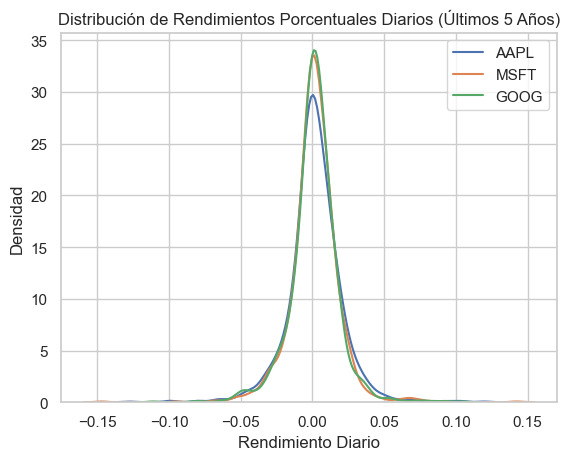

In [259]:
sns.set(style="whitegrid")

# Crear un gráfico de densidad para cada empresa
for symbol in symbols:
    sns.kdeplot(returns[symbol], label=symbol)

plt.title("Distribución de Rendimientos Porcentuales Diarios (Últimos 5 Años)")
plt.xlabel("Rendimiento Diario")
plt.ylabel("Densidad")
plt.legend()
plt.show()

Se ve que el valor más frecuente del rendimiento para Microsoft, Google y Apple, cero, es similar, pero con una menor frecuencia para el caso de Apple. Asimismo, se denota que la desviación estándar de los rendimientos son parecidos para las 3 empresas. En este sentido, también, se observa que la forma de la distribución de rendimientos para las tres empresas se aproxima a la de una normal. Por ultimo, los valores extremos para las tres empresas son semejantes, pues oscilan entre -15% a 15%.